<font color='red'>
<br>Content:
    
* [Introduction](#1)
    * [What are Autoencoders ?](#2)
    * [How Autoencoders Work ?](#3)
* [Implementation and UseCases](#4)
    * [Dataset EDA](#5)
    * [Create Autoencoders Model](#6)
    * [Autoencoders Results](#7)

<a id="1"></a> <br>
## Introduction
<a id="2"></a> <br>
## What are Autoencoders ?
Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

A typical autoencoder architecture comprises of three main components: 

- **Encoding Architecture :** The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.  
- **Latent View Repersentation :** Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.  
- **Decoding Architecture :** The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.  


A highly fine tuned autoencoder model should be able to reconstruct the same input which was passed in the first layer. In this kernel, I will walk you through the working of autoencoders and their implementation.  Autoencoders are widly used with the image data and some of their use cases are: 

- Dimentionality Reduction   
- Image Compression   
- Image Denoising   
- Image Generation    
- Feature Extraction  

<a id="3"></a> <br>
## 1.2 How Autoencoders work 

Lets understand the mathematics behind autoencoders. The main idea behind autoencoders is to learn a low level repersenation of a high level dimentional data. Lets try to understand the encoding process with an example.  Consider a data repersentation space (N dimentional space which is used to repersent the data) and consider the data points repersented by two variables : x1 and x2. Data Manifold is the space inside the data repersentation space in which the true data resides. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


<a id="4"></a> <br>
## Implementation and UseCases
<a id="5"></a> <br>
## Dataset EDA
Load the dataset, separate predictors and target, normalize the inputs.

In [2]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

In [4]:
# normalization
train_x = train_x / 255

In [5]:
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Input

In [6]:
# train test split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [7]:
# reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

<a id="6"></a> <br>
## Create Autoencoders Model

In this section, lets create an autoencoder architecture. The encoding part comprises of three layers with 2000, 1200, and 500 nodes. Encoding architecture is connected to latent view space comprising of 10 nodes which is then connected to decoding architecture with 500, 1200, and 2000 nodes. The final layer comprises of exact number of nodes as the input layer.

In [8]:
input_img = Input(shape=(784,))  # 28x28=784


## encoding layers
encode_layer1 = Dense(1500, activation='relu')(input_img)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding layers
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

outoencoder = model = Model(input_img, output_layer)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

In [10]:
outoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
hist = outoencoder.fit(train_x, train_x, epochs=200, batch_size=2048,shuffle = True, validation_data=(val_x, val_x))

Epoch 1/200
24/24 [==============================] - 1s 35ms/step - loss: 1.4375 - val_loss: 1.1829
Epoch 2/200
24/24 [==============================] - 1s 24ms/step - loss: 1.0989 - val_loss: 1.0024
Epoch 3/200
24/24 [==============================] - 1s 24ms/step - loss: 0.9686 - val_loss: 0.8915
Epoch 4/200
24/24 [==============================] - 1s 25ms/step - loss: 0.8992 - val_loss: 0.8470
Epoch 5/200
24/24 [==============================] - 1s 24ms/step - loss: 0.8062 - val_loss: 0.8291
Epoch 6/200
24/24 [==============================] - 1s 25ms/step - loss: 0.7589 - val_loss: 0.8171
Epoch 7/200
24/24 [==============================] - 1s 27ms/step - loss: 0.6781 - val_loss: 0.6530
Epoch 8/200
24/24 [==============================] - 1s 24ms/step - loss: 0.6615 - val_loss: 0.6168
Epoch 9/200
24/24 [==============================] - 1s 30ms/step - loss: 0.5960 - val_loss: 0.6253
Epoch 10/200
24/24 [==============================] - 1s 27ms/step - loss: 0.5841 - val_loss: 0.5610

24/24 [==============================] - 1s 24ms/step - loss: 0.4298 - val_loss: 0.4341
Epoch 83/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4318 - val_loss: 0.4367
Epoch 84/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4300 - val_loss: 0.4439
Epoch 85/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4301 - val_loss: 0.4274
Epoch 86/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4306 - val_loss: 0.4269
Epoch 87/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4289 - val_loss: 0.4309
Epoch 88/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4298 - val_loss: 0.4354
Epoch 89/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4301 - val_loss: 0.4292
Epoch 90/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4296 - val_loss: 0.4288
Epoch 91/200
24/24 [==============================] - 1s 24ms/step - loss: 0.4296 - val_loss: 0.4337
Epo

24/24 [==============================] - 1s 23ms/step - loss: 0.4232 - val_loss: 0.4240
Epoch 163/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4241 - val_loss: 0.4257
Epoch 164/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4185 - val_loss: 0.4172
Epoch 165/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4153 - val_loss: 0.4241
Epoch 166/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4132 - val_loss: 0.4187
Epoch 167/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4139 - val_loss: 0.4217
Epoch 168/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4164 - val_loss: 0.4190
Epoch 169/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4149 - val_loss: 0.4173
Epoch 170/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4150 - val_loss: 0.4333
Epoch 171/200
24/24 [==============================] - 1s 23ms/step - loss: 0.4159 - val_loss: 0

<a id="7"></a> <br>
## Autoencoders Results

In [11]:
encoder = Model(input_img, latent_view)
encoding = encoder.predict(val_x)   # bu kısım kopyalarken çıkardığı featureları tuttuğumuz kısım.


In [12]:
preds = model.predict(val_x)

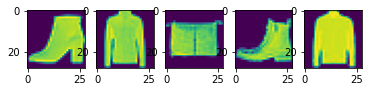

In [13]:
# Inputs: Actual Images
f, ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

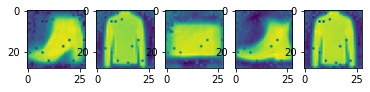

In [14]:
# Predicted : Autoencoder Output
f, ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()